<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.ub.edu/waveng">
      <img src="https://github.com/dmaluenda/resources/raw/master/ub_logo.png" width="130"/>
    </a>
  </td>
  <td>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/WavefrontEngUB/holographicMicro/blob/master/Report.ipynb">
      <img src="https://github.com/dmaluenda/resources/raw/master/colab_logo_32px.png" />
      Run in Google Colab
    </a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/WavefrontEngUB/holographicMicro/blob/master/Report.ipynb">
      <img src="https://github.com/dmaluenda/resources/raw/master/github_logo_32px.png" />
      View source on GitHub
    </a>
  </td>
  <td>
    <a href="https://github.com/WavefrontEngUB/holographicMicro/raw/master/Report.ipynb">
      <img src="https://github.com/dmaluenda/resources/raw/master/download_logo_32px.png" />
      Download notebook
    </a>
  </td>
    <td>
    <a target="_blank" href="https://www.ucm.es/goptic/el-grupo">
      <img src="https://github.com/dmaluenda/resources/raw/master/ucm_logo.png" width="130"/>
    </a>
  </td>
</table>

# Holographic microscopy of highly focused fields via Phase Retrieval

**David Maluenda<sup>1\*</sup>, Marcos Pérez-Aviñoa<sup>1</sup>, Rosario Martinez-Herrero<sup>2</sup>, and Artur Carnicer<sup>1</sup>**

*<sup>1</sup>Universitat de Barcelona (UB), Facultat de Física, Departament de Física aplicada, Martí i Franquès 1, 08028,
Barcelona, Spain*

*<sup>2</sup>Universidad Complutense de Madrid (UCM), Departamento de Óptica, Ciudad Universitaria, 28040, Madrid,
Spain*

*dmaluenda@ub.edu

**Abstract**: Blablabla

<hr>

**Funding**: Projects PID2019-104268GB-C21 and PID2019-104268GB-C22 by MCIN / AEI / 10.13039 / 501100011033.
<table class="tfo-notebook-buttons" align="left">
  <td>
      <img src="https://github.com/dmaluenda/resources/raw/master/logo_gobierno.png" width="130"/>
  </td>
  <td>
  </td>
  <td>
      <img src="https://github.com/dmaluenda/resources/raw/master/logo_aei.svg"  width="100"/>
  </td>
</table>


In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
import importlib
from ipywidgets import interactive, IntSlider, Layout, HBox, VBox, TwoByTwoLayout
from IPython.display import display

warnings.filterwarnings("ignore")

home_dir = Path(os.path.expanduser('~'))
OneDrive_dir = home_dir / "OneDrive - Universitat de Barcelona"

fig_num = 0  # Figures counter
verbose = 3  # 0: Main paper figures ; 1: Also Suplementari material figures ; 2: All checks included

In [2]:
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    !pip install pyfftw
    !pip install -U matplotlib==3.5.2
else:
    try:
        import pyfftw
    except ImportError:
        if input("'pyfftw' module is needed. "
                 "Do you want to install it via pip? "
                    "[Y/n]  ").lower().startswith('n'):
            print('ok... continue, so.')
        else:
            print("!pip install  pyfftw")
            !pip install pyfftw

In [4]:
def install_devel_module(module_name, module_git=None, module_path=None, branch=None):
    """ This function is just to import a module which might be under developing.

        There are three options:
            1. The module is already installed in the system, so let's import it.
            2. The module is not installed, but it is located in the PC, so let's install it and import it.
            3. The module is not installed, and it is not located in the PC, so let's git-clone it, install it, and imported it.

        :param module_name: The module that we want to import
        :param module_path: The path where to find that module. If not passed, used ./<module_name>
        :param module_git: The https route where to find that module. If not passed, used .../WavefrontEngUB/<module_name>
        :param branch: Just if you want a certain branch of this repo.
        :return: module, class, or function imported
    """

    try:
        importlib.import_module(module_name)
        print(f"'{module_name}' module already installed.")
        return
    except ImportError:
        pass

    print(f"'{module_name}' module not installed, yet.")
    module_git = "https://github.com/WavefrontEngUB/" + module_name if module_git is None else module_git
    module_path = module_name if module_path is None else str(module_path)

    do_clone = False
    if 'google.colab' in sys.modules:  # You are in google colab
        do_clone = True
        pip_path = module_name
        print("In Google Colab detected")
    else:
        if not Path(module_path).exists():
            module_path = input(f"Type the path where you have the {module_name} module "
                                f"or left empty to git-clone it in the CWD: ")
            if module_path == "":
                do_clone = True
                pip_path = module_name
            else:
                pip_path = module_path
        else:
            pip_path = module_path
            print(f"Module {module_name} found in {module_path}")

    if do_clone:
        if not Path(pip_path).exists():
            print(f"Cloning '{module_name}' module from {module_git} in {Path(pip_path).resolve()}")
            !git clone {module_git} {pip_path}
            if branch is not None:
                print(f"Checking out '{branch}' branch")
                !cd {pip_path} && git checkout {branch}

    print(f"Installing '{module_name}' module from {pip_path}")
    !pip install -e {'"%s"' % pip_path}
    print(f"'{module_name}' module installed. You might need restart the kernel to import it...")

In [6]:
# Getting pyHolo software
# TODO: replace this with a '!pip install -U pyHolo' or so
install_devel_module("pyHolo")

import pyHolo

C:\Users\dmaluenda\OneDrive - Universitat de Barcelona\Research\WorkInProgress\holographic_microscope
'pyHolo' module already installed.


In [7]:
#Getting phase_retriever software
install_devel_module("phase_retriever")
import phase_retriever.retriever as phase_retriever

'phase_retriever' module already installed.


In [8]:
pixel_size, cXv, cYv, cXh, cYh = -9999.99, 2043, 1340, 2773, 1347

In [9]:
scale_ph = Path('data')/"scale.png"

w = pyHolo.misc.interactive_pixel_size(scale_ph, pixel_size, cXv, cYv, cXh, cYh, verbose=verbose, fig_num=fig_num)

Let's check the resolution of the system by exploring scale.png file, i.e. the effective pixel size (sampling rate).

Unckeck 'Calculate' to be more responsive when interacting with sliders.


In [10]:
pixel_size, fig_num = w.result
cXv, cYv, cXh, cYh = list(w.kwargs.values())[:4]

print(pixel_size, "| Box positions:", cXv, cYv, cXh, cYh) if verbose>1 else None

pixel_size.get()

0.037 um/pixel | Box positions: 2043 1340 2773 1347


0.03650700934579439

## Linearly polarized incident field to spherical beads of 70 nm diameter

blablabla

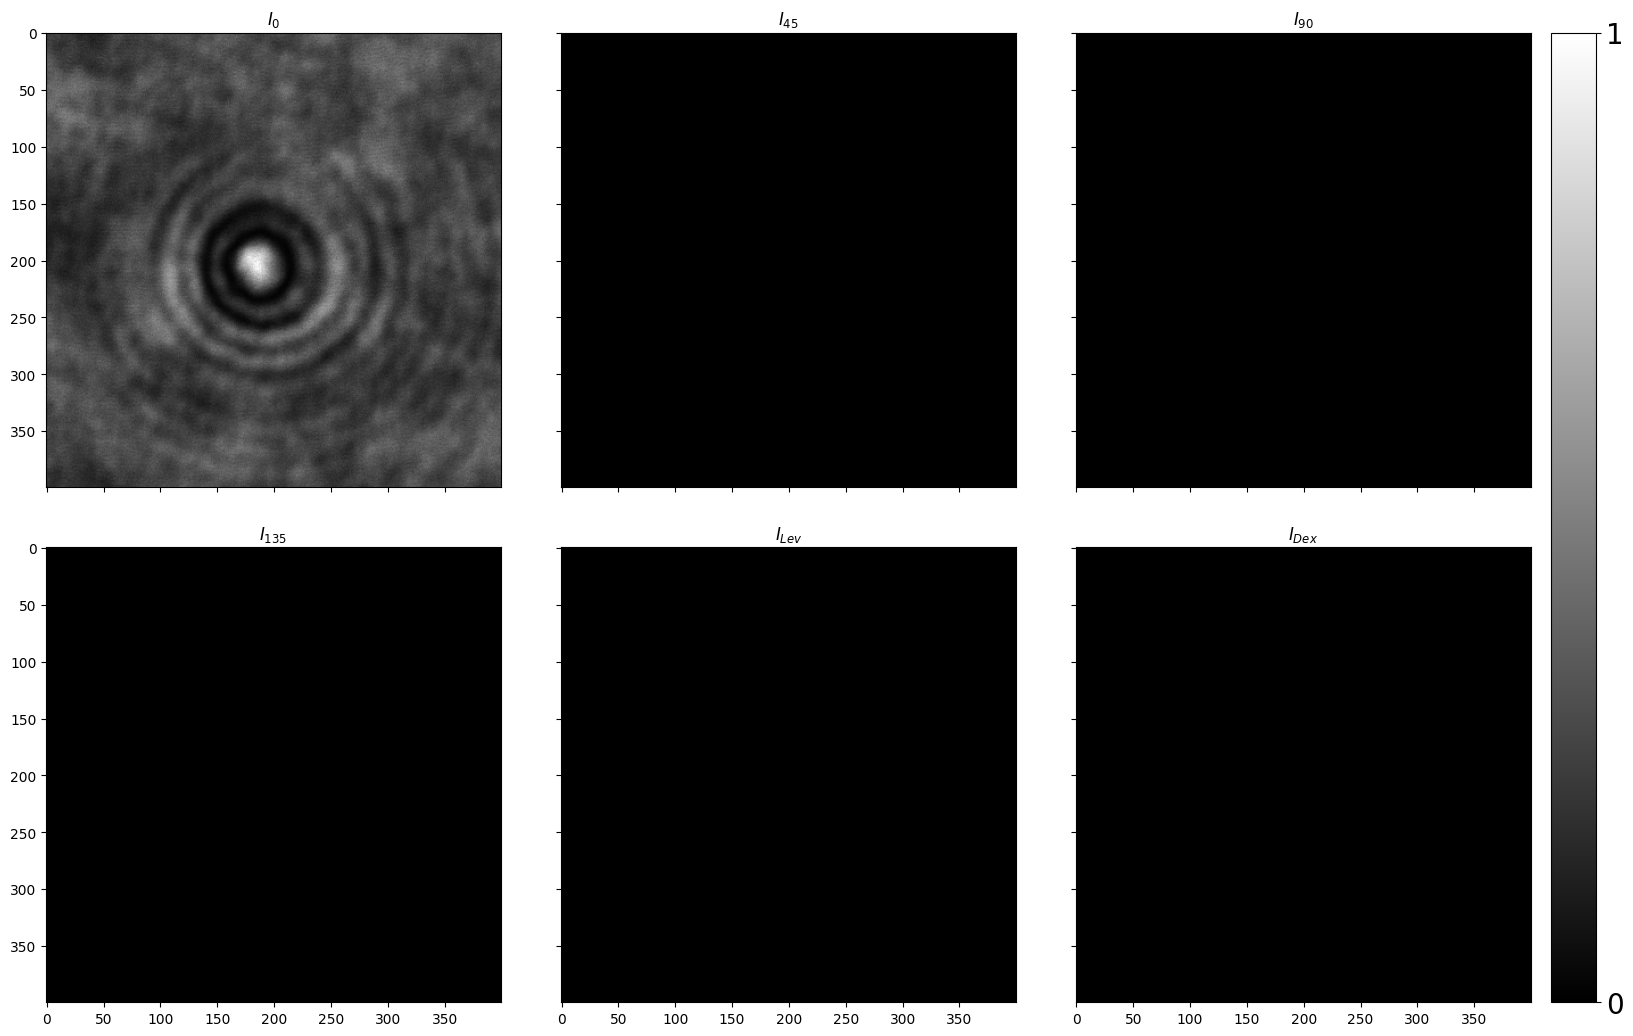

Figure 2:  beam: Polarimetric images.


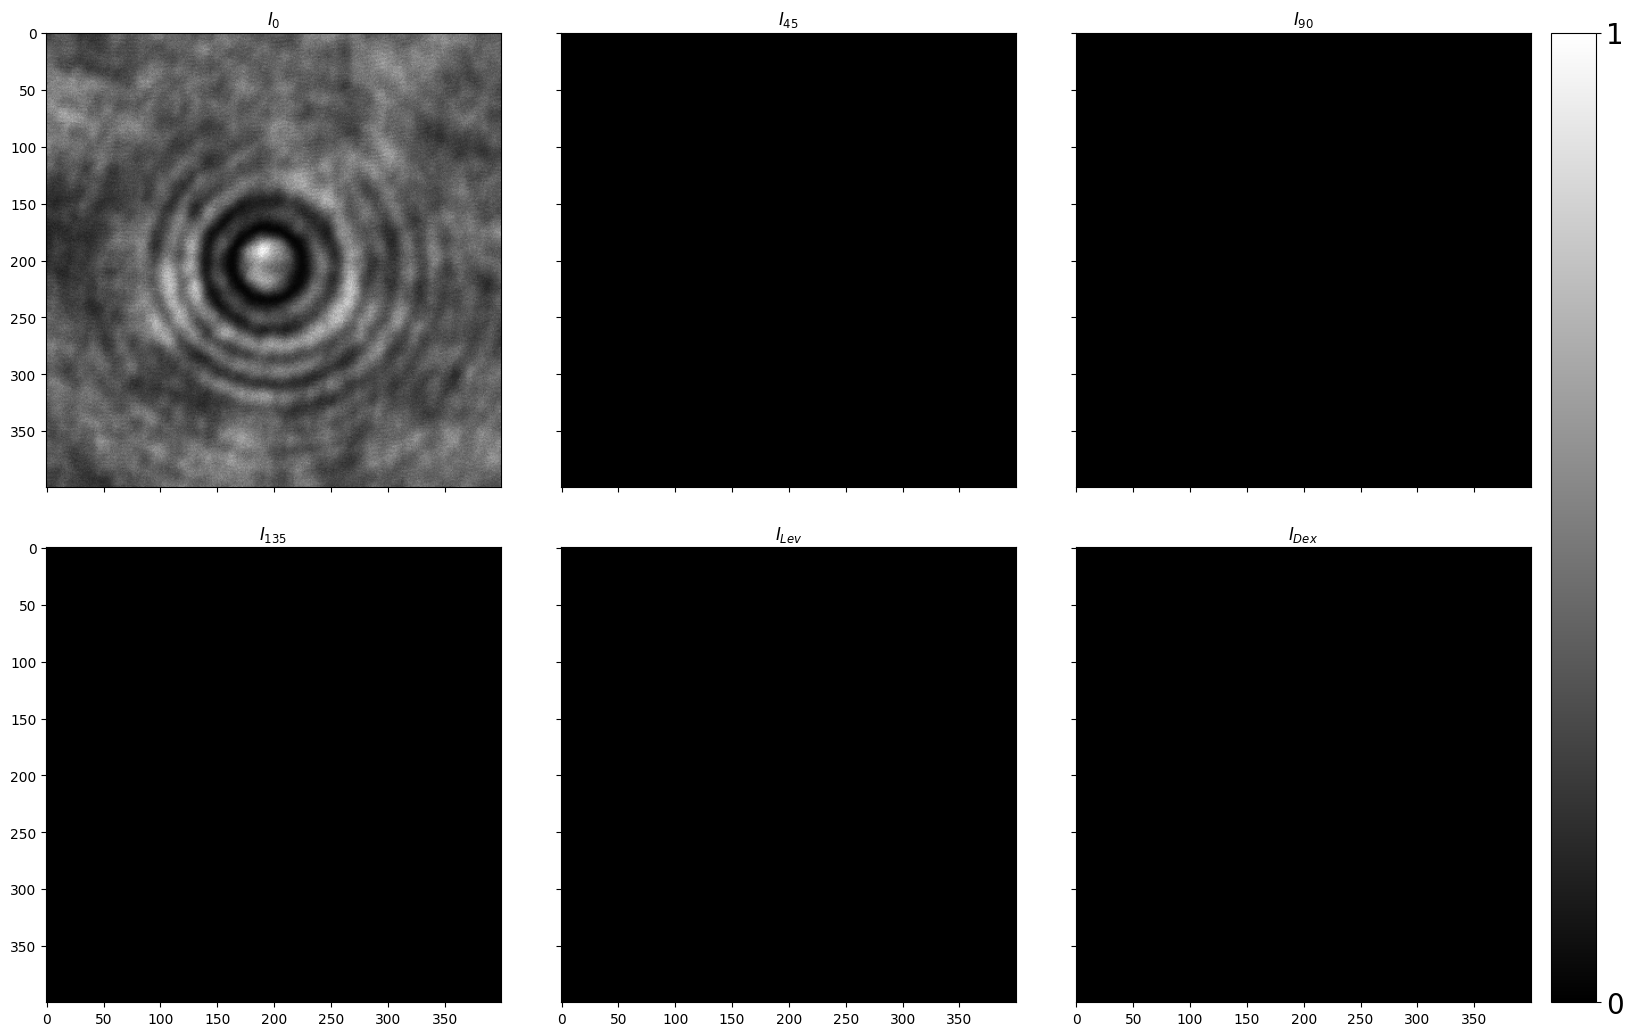

Figure 3:  beam: Polarimetric images.


In [11]:
raw_data_lin_bead40 = Path("data") / "beads_5"

lin_beads40_retriever = phase_retriever.PhaseRetriever()

lin_beads40_retriever.load_dataset(raw_data_lin_bead40, ftype='npy')
lin_beads40_retriever.config(dim=400)
lin_beads40_retriever.config(rect=((550,550), (950,950)))
lin_beads40_retriever.config(pixel_size=pixel_size.get('lam'))
lin_beads40_retriever.config(lamb=1)
lin_beads40_retriever.config(mode='scalar')
# lin_beads40_retriever.center_window()
lin_beads40_retriever.select_phase_origin()



# Showing the raw irradiances captured by the camera (verbose > 1)
fig_num = pyHolo.misc.plot_polarimetric_images(lin_beads40_retriever.get_images(0), "", fig_num) if verbose > 1 else fig_num
fig_num = pyHolo.misc.plot_polarimetric_images(lin_beads40_retriever.get_images(1), "", fig_num) if verbose > 1 else fig_num

In [12]:
lin_beads40_retriever.compute_bandwidth(tol=4e-6)
lin_beads40_retriever.config(bandwidth=15)
if verbose > 1:
    for option in lin_beads40_retriever.options:
        print(option, lin_beads40_retriever.options[option])

pixel_size 0.07102531001127314
dim 400
rect [(550, 550), (950, 950)]
n_max 200
eps 0.01
bandwidth 15
origin (199, 184)
lamb 1
path data\beads_5
ext npy
mode scalar


In [13]:
lin_beads40_retriever.retrieve()
lin_beads40_field, _ = lin_beads40_retriever.get_trans_fields()
# print(lin_beads40_field)

In [14]:
# [d.keys()*d.get('scale') for d in lin_beads40_retriever.polarimetric_sets.values()]

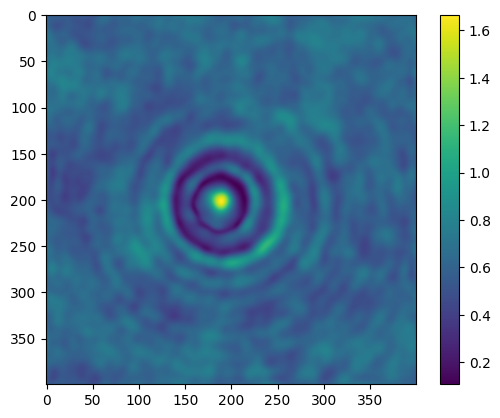

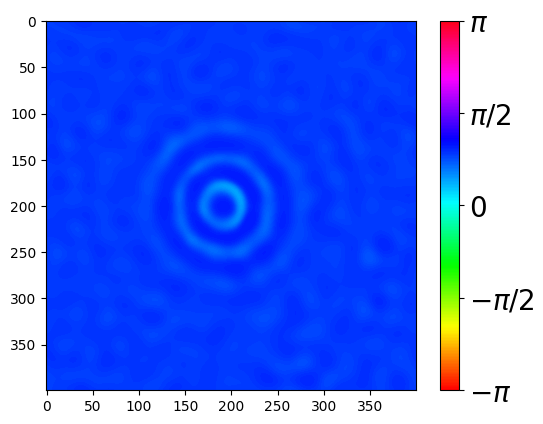

In [15]:
plt.imshow(np.abs(lin_beads40_field))
plt.colorbar()
plt.figure()
im=plt.imshow(np.angle(lin_beads40_field), vmin=-np.pi, vmax=np.pi, cmap='hsv')
cbar=plt.colorbar(im,  # FIXME: The line below is not working
# cbar = fig.colorbar(im, ax=ax, cax=axs.cbar_axes[idx], orientation='vertical', shrink=0.5,
                                 ticks=[-np.pi, -np.pi / 2, 0, np.pi / 2,
                                        np.pi])
cbar.ax.set_yticklabels(
    [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'], fontsize=20)
plt.show()

### 2. Linearly polarized incident field to spherical beads of $1 \mu m$ diameter

blablabla

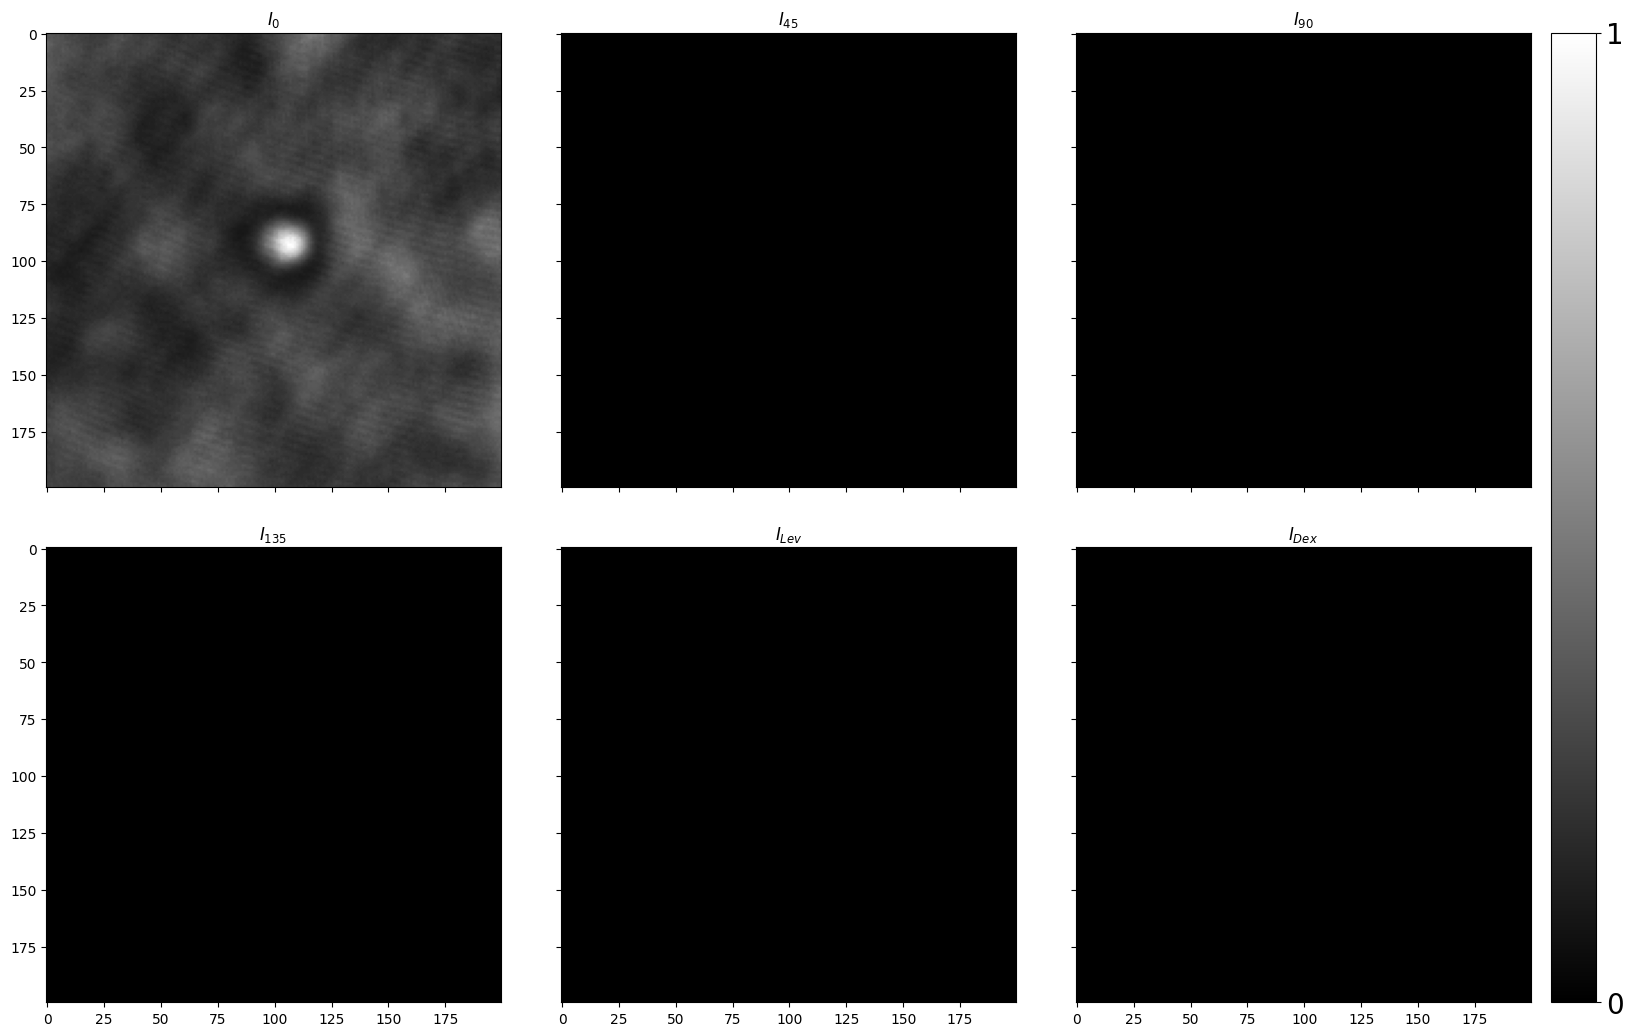

Figure 4:  beam: Polarimetric images.


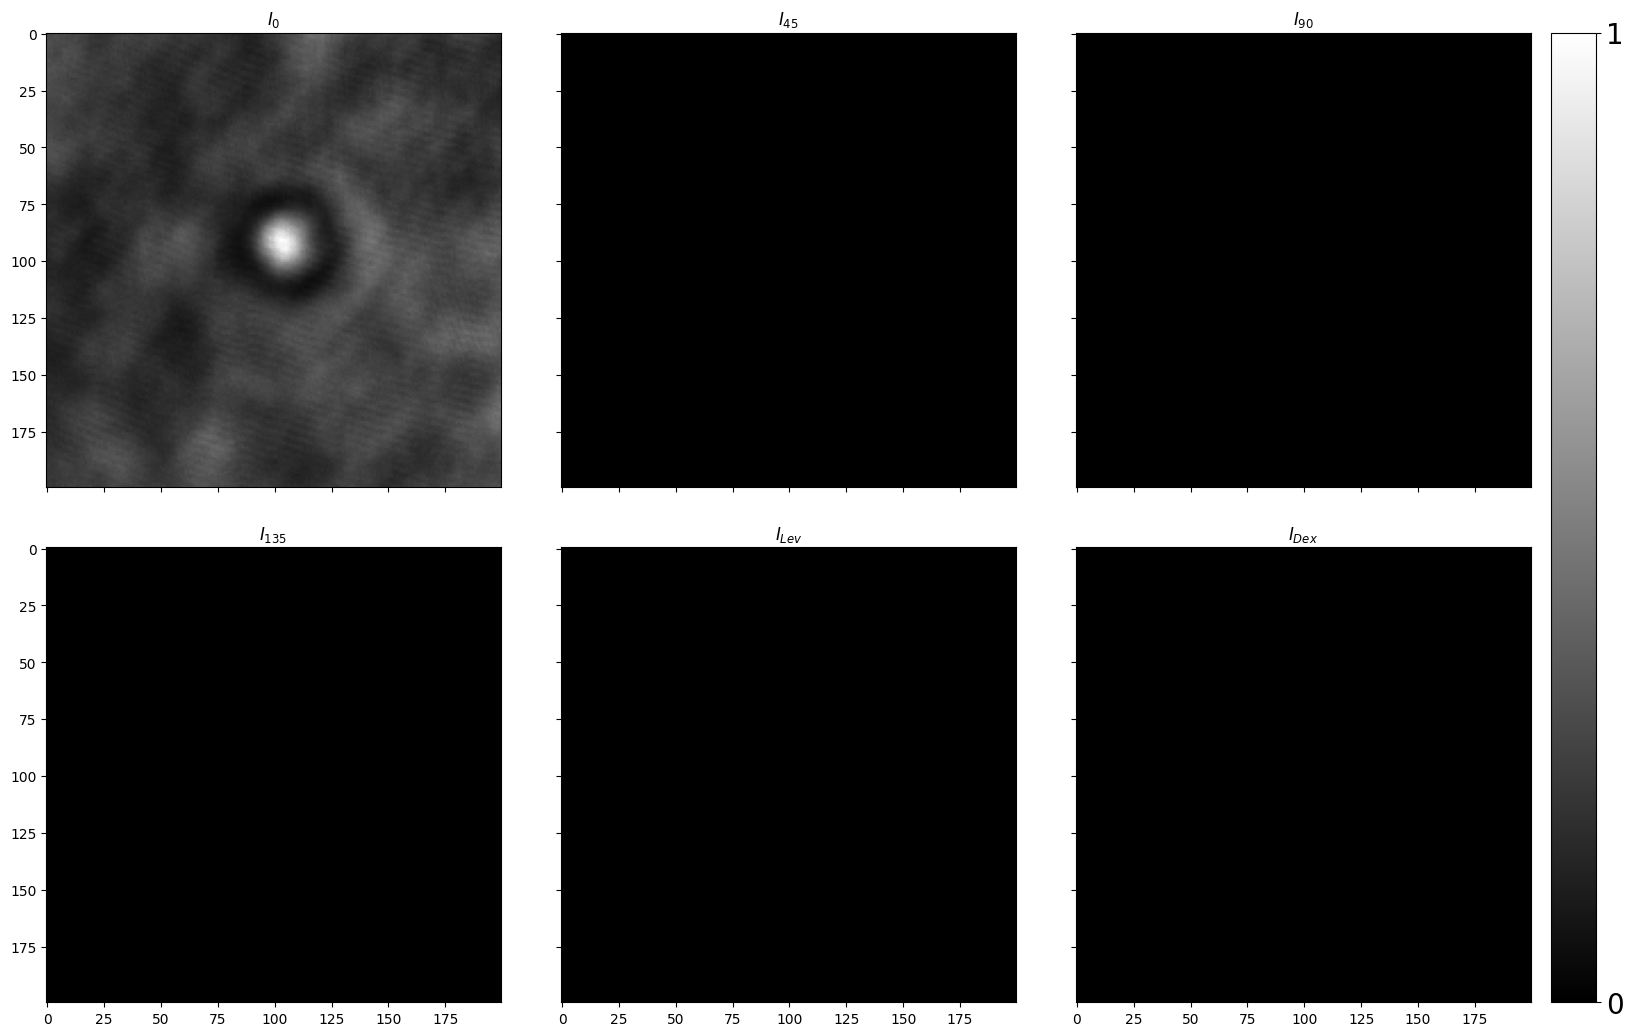

Figure 5:  beam: Polarimetric images.


In [16]:
lin_beads1um_data = Path("data") / "beads_9"

lin_beads1um_retriever = phase_retriever.PhaseRetriever()

lin_beads1um_retriever.load_dataset(lin_beads1um_data, ftype='npy')
lin_beads1um_retriever.config(dim=200)
lin_beads1um_retriever.config(pixel_size=pixel_size.get('lam'))
lin_beads1um_retriever.config(lamb=1)
lin_beads1um_retriever.config(mode='scalar')
lin_beads1um_retriever.center_window()
lin_beads1um_retriever.config(rect=((300,300), (500,500)))
# lin_beads1um_retriever.select_phase_origin()

# Showing the raw irradiances captured by the camera (verbose > 1)
fig_num = pyHolo.misc.plot_polarimetric_images(lin_beads1um_retriever.get_images(0), "", fig_num) if verbose > 1 else fig_num
fig_num = pyHolo.misc.plot_polarimetric_images(lin_beads1um_retriever.get_images(1), "", fig_num) if verbose > 1 else fig_num

In [17]:
lin_beads1um_retriever.compute_bandwidth(tol=4e-6)
lin_beads1um_retriever.config(bandwidth=25)
if verbose > 1:
    for option in lin_beads1um_retriever.options:
        print(option, lin_beads1um_retriever.options[option])

lin_beads1um_retriever.retrieve()
lin_beads1um_field, _ = lin_beads1um_retriever.get_trans_fields()

pixel_size 0.07102531001127314
dim 200
rect [(300, 300), (500, 500)]
n_max 200
eps 0.01
bandwidth 25
origin None
lamb 1
path data\beads_9
ext npy
mode scalar


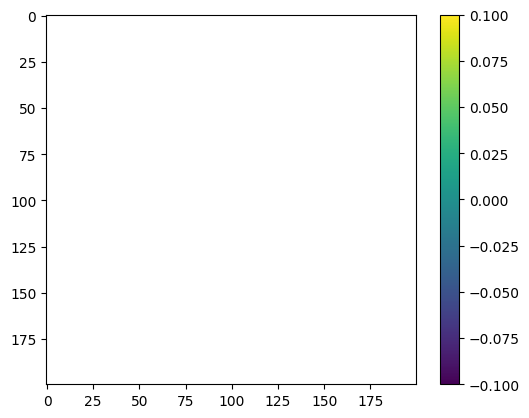

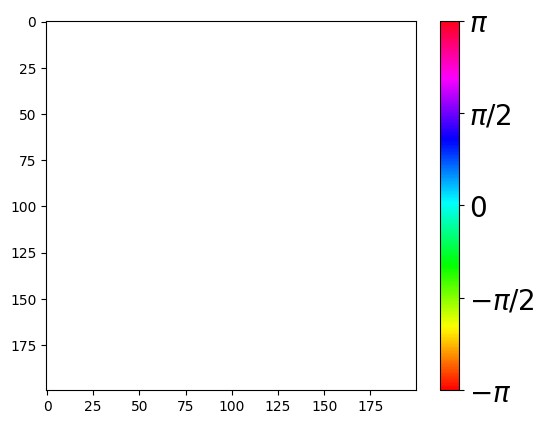

In [18]:
plt.imshow(np.abs(lin_beads1um_field))
plt.colorbar()
plt.figure()
im=plt.imshow(np.angle(lin_beads1um_field), vmin=-np.pi, vmax=np.pi, cmap='hsv')
cbar=plt.colorbar(im,  # FIXME: The line below is not working
# cbar = fig.colorbar(im, ax=ax, cax=axs.cbar_axes[idx], orientation='vertical', shrink=0.5,
                                 ticks=[-np.pi, -np.pi / 2, 0, np.pi / 2,
                                        np.pi])
cbar.ax.set_yticklabels(
    [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'], fontsize=20)
plt.show()